According to Newton's law of universal gravitation, the gravitational force \( F \) between two masses \( M \) (Earth) and \( m \) (object) separated by a distance \( R+h \)  where R is raidus of the Earth and h is height of the object above Earth's surface is given by:

\begin{align}
F(h) = G \frac{M m}{(R + h)^2}
\end{align}

The gravitational force F(h) is also equal to the: $F(h) = m g(h)$


Setting these expressions for F(h) equal to each other, we get:
\begin{align}
g = G \frac{M}{R^2}
\end{align}

Substituting $ G*M= g*R^2 $ into the equation 1 for g(h) we get:
\begin{align}
g(h) = \frac{g R^2}{(R + h)^2}
\end{align}

$$

The Euler integration method is a simple numerical procedure for solving ordinary differential equations (ODEs) with a given initial value. For an ODE of the form:
\begin{equation}
\frac{dy}{dt} = f(t, y)
\end{equation}
with initial condition $ y(t_0) = y_0 $, the Euler method updates the value of $y $ over a small time step $\Delta t $ as follows:
\begin{equation}
y_{n+1} = y_n + \Delta t \cdot f(t_n, y_n)
\end{equation}
where $ y_n $ is the value of $ y $ at time step $n$, and $ t_n = t_0 + n \Delta t$.


For a falling body with height-dependent gravitational field and velocity-dependent damping, we have two coupled first-order ODEs:
\begin{align}
\frac{dy}{dt} &= -v \\
\frac{dv}{dt} &= g(h) -\frac{ k v^2}{m}
\end{align}
where $ y $ is the height, $ v $ is the velocity, $ g(h) = g \left( \frac{R}{R + h} \right)^2 $ is the height-dependent gravitational acceleration, and $ k $ is the damping coefficient.

The Euler integration steps for this problem are:
\begin{align}
y_{n+1} &= y_n + \Delta t \cdot v_n \\
v_{n+1} &= v_n + \Delta t \cdot \left( g(h_n) - \frac{k v_n^2}{m} \right)
\end{align}

Initial initial conditions and parameters are : gravitational acceleration at the Earth's surface $g$, the Earth's radius $R$, the damping coefficient $k$, the mass of the body $m$, the initial height $h_0$​, and the initial velocity $v_0$​. The time step $Δt$ is and the total simulation time are defined as well.

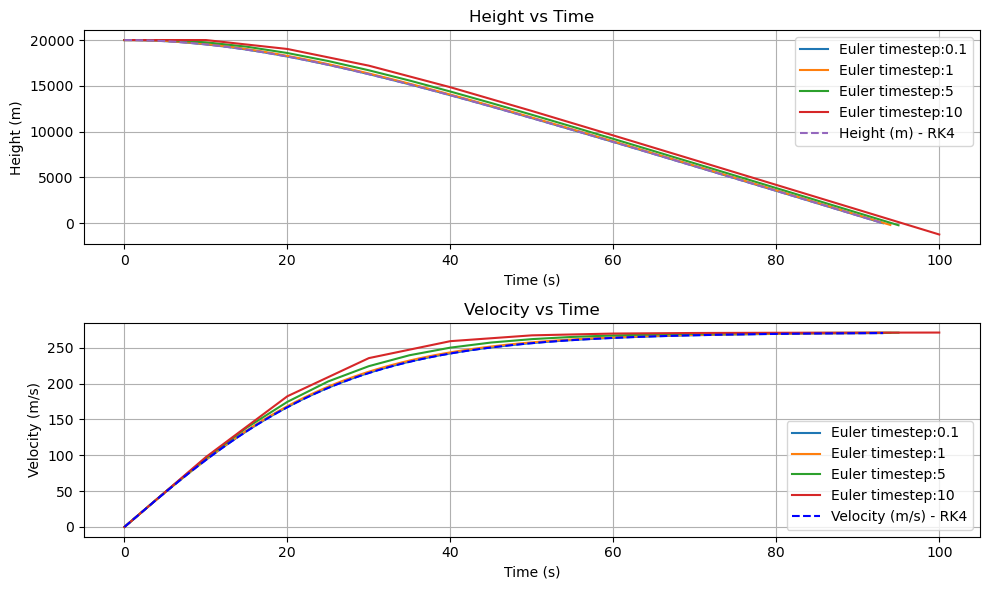

Terminal velocity achieved:270.4506551344462, corresponding time: 93.09999999999899
Theoretical Value of terminal velocity:271.2471198003769
Number of iterations for time step dt=5s :200.0


In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Some constants
R=6371000  
G=9.81  
k=2e-4  
m=1.5  

#initial values
v0=0  
h0=20000 
dt_euler_arr=[0.1, 1, 5, 10]
dt_rk4=0.1 
t_max=1000  

# Euler method lists
t_list=[0]
h_list=[h0]
v_list=[v0]

# RK4 method lists
t_list_rk4=[0]
h_list_rk4=[h0]
v_list_rk4=[v0]

def euler_step(h, v, dt_euler):
    g=G*(R/(R+h))**2
    dv=g*dt_euler-k *v*abs(v)*dt_euler/m
    dh =-v*dt_euler
    return h+dh, v+dv
#Runge-Kutta method
def rk4_step(h, v, dt_rk4):
    g =G*(R/(R+h))** 2
    
    k1_h=-v
    k1_v=g-(k/m)*v*abs(v)
    
    k2_h =-(v+0.5*k1_v*dt_rk4)
    k2_v= g-(k/m)*(v+0.5*k1_v*dt_rk4)*abs(v+0.5*k1_v*dt_rk4)
    
    k3_h=-(v +0.5*k2_v*dt_rk4)
    k3_v=g-(k/m)*(v+0.5*k2_v*dt_rk4)*abs(v+0.5*k2_v*dt_rk4)
    
    k4_h=-(v+k3_v*dt_rk4)
    k4_v=g-(k/m)*(v+k3_v*dt_rk4)*abs(v+k3_v*dt_rk4)
    
    dh = (k1_h +2*k2_h+2*k3_h + k4_h)/6*dt_rk4
    dv = (k1_v+2*k2_v+2*k3_v+k4_v)/6*dt_rk4
    
    return h + dh, v + dv

# Euler integration loop
max_v=0
max_t=0
plt.figure(figsize=(10, 6))

for dt_euler in dt_euler_arr:
    t = 0
    t_list=[0]
    h_list=[h0]
    v_list=[v0]
    while t < t_max and h_list[-1] > 0:
        h, v = euler_step(h_list[-1], v_list[-1], dt_euler)
        t += dt_euler
        t_list.append(t)
        h_list.append(h)
        v_list.append(v)
        if v>max_v and dt_euler==0.1:
            max_v=v
            max_t=t
    plt.subplot(2, 1, 1)
    plt.plot(t_list, h_list, label=f'Euler timestep:{dt_euler}')
    plt.subplot(2, 1, 2)
    plt.plot(t_list, v_list, label=f'Euler timestep:{dt_euler}')

    

# RK4 integration loop
t = 0
while t < t_max and h_list_rk4[-1] > 0:
    h, v = rk4_step(h_list_rk4[-1], v_list_rk4[-1], dt_rk4)
    t += dt_rk4
    t_list_rk4.append(t)
    h_list_rk4.append(h)
    v_list_rk4.append(v)

# Plotting the results

plt.subplot(2, 1, 1)
plt.plot(t_list_rk4, h_list_rk4, label='Height (m) - RK4', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time')
plt.grid(True)
plt.legend()
plt.subplot(2, 1, 2)
#plt.plot(t_list, v_list, label='Velocity (m/s) - Euler', color='r')
plt.plot(t_list_rk4, v_list_rk4, label='Velocity (m/s) - RK4', color='b', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
print(f"Terminal velocity achieved:{max_v}, corresponding time: {max_t}")
print(f"Theoretical Value of terminal velocity:{np.sqrt(m*G/k)}")
print(f"Number of iterations for time step dt=5s :{t_max/5}")


To validate the code one can analyze graph and see the behaviour of the height and velocity functions. The Euler method provides a numerical solution to the height and velocity of the falling body. Let's have a look for graphs when euler timestep is 0.1s. The plots generated from the simulation show that the height decreases and the velocity increases initially due to gravity, and then the velocity stabilizes due to the damping effect and it's getting its terminal value of 270.45 m/s. Theoretical value of the terminal velocity can be calulated using the following formula $v=\sqrt{m*G/k}$ and  it is equal to 271.25 m/s. $h_0$ (dropping height) was set to 20000 m steps, instead of 10000, so it was easier to observe the asymptotic behaviour of the velocity function. Damping effect is getting significant enought to counteract further acceleration when velocity of the object increases.Additionally, the Runge-Kutta numerical method (RK4) was used to verify the validity of the Euler method. It can clearly be observed that the two methods converge, which provides a valid reason to consider our code trustworthy when euler timestep is equal to 5s. When euler timestep is more than 5s some deviation from the actual solution can happen.

                                                    Part 2, The Euler-Richardson method


The Euler-Richardson method is an improvement over the simple Euler method for numerically solving differential equations. It is a second-order method that provides better accuracy by counting an intermediate step.

The general approach for Euler-Richardson method is the following:
    Calculating the midpoint step:
        $$ \begin{align}
    y_{\text{half}} &= y_n + \frac{\Delta t}{2} f(t_n, y_n) \\
    v_{\text{half}} &= v_n + \frac{\Delta t}{2} a(t_n, y_n, v_n)
    \end{align}$$
Where y is coordinate, v is velocity, a is acceleration and $\Delta t$ is time.
Final values can be calculated using intermediate values:
$$\begin{align}
    y_{n+1} &= y_n + \Delta t \, f\left(t_n + \frac{\Delta t}{2}, y_{\text{half}}\right) \\
    v_{n+1} &= v_n + \Delta t \, a\left(t_n + \frac{\Delta t}{2}, y_{\text{half}}, v_{\text{half}}\right)
    \end{align}$$


Where:
- $ y_n $ and $ v_n $ are the position and velocity at the current step $ n $.
- $ \Delta t $ is the time step.
- $ f(t, y) $ represents the rate of change of position (which is the velocity).
- $ a(t, y, v) $ represents the acceleration.

If we use equations of motion for falling body, intermediate and final steps will be calculated as follows:


$$
\begin{align}
y_{\text{half}} &= y_n - \frac{\Delta t}{2} v_n \\
v_{\text{half}} &= v_n + \frac{\Delta t}{2} g(y_n)
\end{align}  
$$

Use the intermediate values to update the final values:

$$
\begin{align}
y_{n+1} &= y_n - \Delta t \, v_{\text{half}} \\
v_{n+1} &= v_n + \Delta t \, g(y_{half})
\end{align}
$$

Where:
- $ y_n $ and $ v_n $ are the height and velocity at the current time step $ n $.
- $ y_{\text{half}} $ and $ v_{half} $ are the height and the velocity at midpoint.

Euler-Richardson method provides a more accurate estimate of the position and velocity at each time step compared to the simple Euler method.


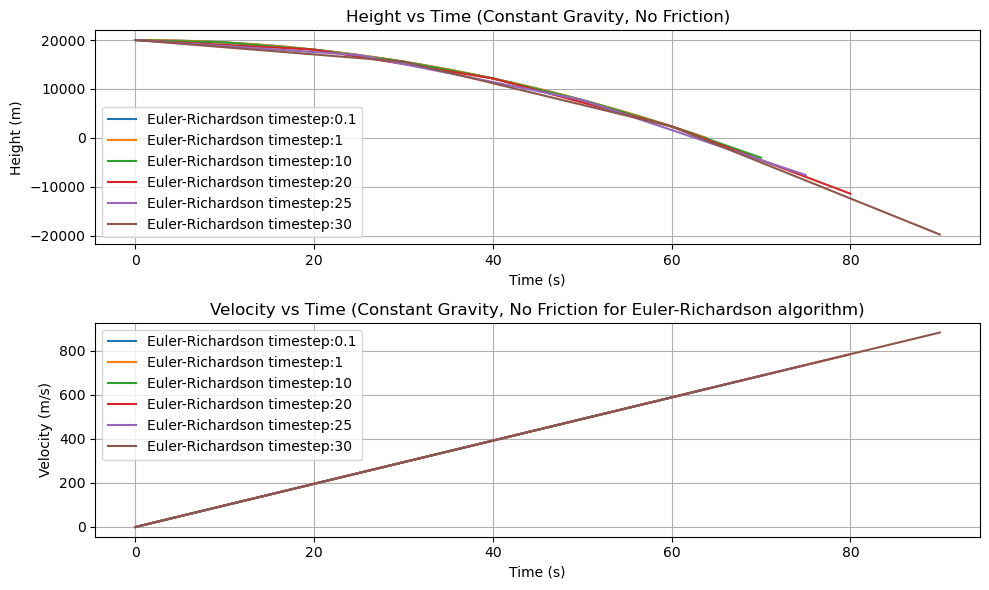

number of iterations for timestep dt=30s :33.333333333333336


In [99]:
dt_arr=[0.1, 1, 10, 20, 25, 30]

def euler_richardson_step_constant(h, v, dt):
    g=G
    # Midpoint values
    v_mid=v+0.5*(g)*dt
    h_mid =h+0.5*v*dt
    # Full step
    dv=(g)*dt
    dh=v_mid*dt
    return h-dh, v+dv

plt.figure(figsize=(10, 6))

t_list_er_constant=[0]
h_list_er_constant=[h0]
v_list_er_constant=[v0]
for dt in dt_arr:
    t=0
    t_list_er_constant=[0]
    h_list_er_constant=[h0]
    v_list_er_constant=[v0]
    while t<t_max and h_list_er_constant[-1]>0:
        h, v=euler_richardson_step_constant(h_list_er_constant[-1], v_list_er_constant[-1], dt)
        t+=dt
        t_list_er_constant.append(t)
        h_list_er_constant.append(h)
        v_list_er_constant.append(v)
    plt.subplot(2, 1, 1)
    plt.plot(t_list_er_constant, h_list_er_constant, label=f'Euler-Richardson timestep:{dt}')
    plt.subplot(2, 1, 2)
    plt.plot(t_list_er_constant, v_list_er_constant, label=f'Euler-Richardson timestep:{dt}')
# Plotting the results


    
plt.subplot(2, 1, 1)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time (Constant Gravity, No Friction)')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time (Constant Gravity, No Friction for Euler-Richardson algorithm)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
print(f"number of iterations for timestep dt=30s :{t_max/30}")

The Euler-Richardson algorithm was tested with multiple time steps (0.1, 1, 10, 20, 25, 30), it was observed to perform better, with larger time steps compared to the Euler algorithm, which provided stable solutions only when dt < 10. The graph above illustrates the growth of velocity over time, showing a linear increase as expected due to constant acceleration in the absence of friction. The height decreases over time. The difference between the Euler and Euler-Richardson algorithms is due to the presence of drag in the Euler algorithm (resulting in terminal velocity) as well as because of the different approach of the Euler-Richardson method, which improves accuracy by taking an initial half-step to estimate the derivative at the midpoint of the interval. For the Euler method, it is evident that the object takes significantly more time to fall, explained by friction that slows the object down, and the decreasing acceleration due to the increase in $v^2$ in the drag formula.

Conclusion: To analyze the results for the Euler method, a time step of $dt_{\text{euler}} = 5$ s was used, requiring a smaller time step to achieve stable results, thus causing the increasing the iteration number of $N_{euler}$=200 . The Euler-Richardson method provides better accuracy compared to the Euler method due to its midpoint-based approach. Although a time step of $dt_{\text{rich}} = 30$ s can be used for Euler-Richardson to analyze the results, so it allows for larger time steps, decreases iteration number to $N=33$ so is more accurate.